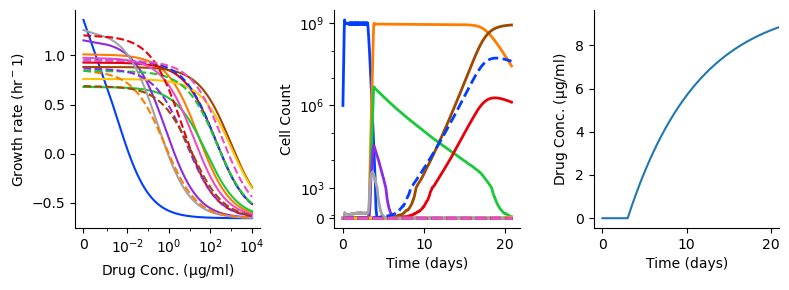

In [49]:
from fears.population import Population
from fears.utils import plotter
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022) # set random seed for reproducibility

options = {'max_dose':10, # max drug concentration
           'n_sims':1,
           'k_abs':0.005, # rate of change of drug concentration
           'k_elim':0,
           'dwell':True, # add a delay before the addition of drug
           'dwell_time':24*3, 
           'carrying_cap':10**9,
           'mut_rate':10**-8,
           'plot':False,
           'n_timestep':500}

p = Population(fitness_data='from_file',**options)
counts, et = p.simulate();

fig,ax_list = plt.subplots(ncols=3,figsize=(8,3))
ax = ax_list[0]

figx,ax = plotter.plot_fitness_curves(p,ax=ax,show_legend=False,labelsize=10,
                                      linewidth=1.5)
ax.set_xticks([0,10**-2,10**0,10**2,10**4])
ax.set_xlabel('Drug Conc. ($\mathrm{\mu}$g/ml)')

t = np.arange(500)/24
cc = plotter.gen_color_cycler()
ax = ax_list[1]
ax.set_prop_cycle(cc)

ax.plot(t,counts,linewidth=2)

ax.set_yscale('symlog',linthresh=10**3)
ax.set_yticks([0,10**3,10**6,10**9])
ax.set_ylabel('Cell Count')
ax.set_xlabel('Time (days)')

ax = ax_list[2]

t = np.arange(len(p.drug_curve))/24
ax.plot(t,p.drug_curve)

ax.set_xlim([-1,21])
ax.set_xlabel('Time (days)')
ax.set_ylabel('Drug Conc. ($\mathrm{\mu}$g/ml)')

for ax in ax_list:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()